In [1]:
!pip install qbraid==0.7.0.dev20240516020308 --quiet
!pip install qiskit --quiet
!pip install stimcirq --quiet
!pip install matplotlib --quiet

In [2]:
import warnings
import logging

logger = logging.getLogger()

logger.setLevel(logging.INFO)

warnings.filterwarnings("ignore", category=UserWarning)

Create our qiskit circuit

In [3]:
from qiskit import QuantumCircuit

In [4]:
qiskit_circuit = QuantumCircuit(2, 2)

qiskit_circuit.h(0)
qiskit_circuit.cx(0, 1)
qiskit_circuit.measure_all()

qiskit_circuit.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
   c: 2/══════════════╬══╬═
                      ║  ║ 
meas: 2/══════════════╩══╩═
                      0  1

Now let's look at our currrent conversion graph

In [5]:
from qbraid.programs import QPROGRAM_REGISTRY
from qbraid.transpiler import ConversionGraph

In [6]:
QPROGRAM_REGISTRY

{'cirq': cirq.circuits.circuit.Circuit,
 'qiskit': qiskit.circuit.quantumcircuit.QuantumCircuit,
 'pennylane': pennylane.tape.tape.QuantumTape,
 'pyquil': pyquil.quil.Program,
 'pytket': pytket._tket.circuit.Circuit,
 'braket': braket.circuits.circuit.Circuit,
 'openqasm3': openqasm3.ast.Program,
 'qasm2': str,
 'qasm3': str}

In [7]:
graph = ConversionGraph()

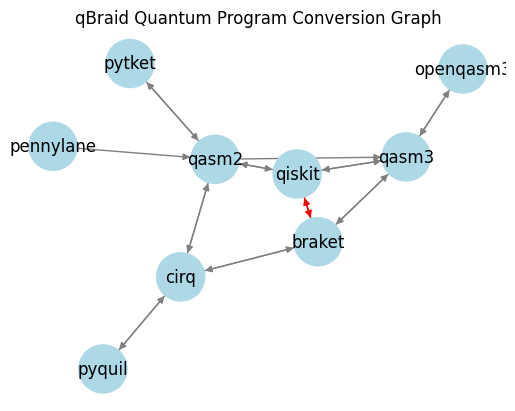

In [8]:
graph.plot()

To convert our qiskit circuit to stim, we need to define a new conversion

In [9]:
from qbraid.transpiler import Conversion

from stimcirq import cirq_circuit_to_stim_circuit

In [10]:
conversion = Conversion("cirq", "stim", cirq_circuit_to_stim_circuit)

In [11]:
graph.add_conversion(conversion)

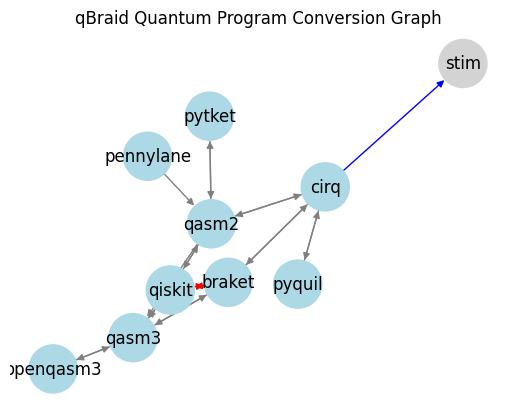

In [12]:
graph.plot()

In [13]:
graph.has_path("qiskit", "stim")

True

Now we have a path to convert from qiskit to stim!

In [14]:
from qbraid.transpiler import transpile

Perform the conversion using our custom conversion graph

In [15]:
stim_circuit = transpile(qiskit_circuit, "stim", conversion_graph=graph)

type(stim_circuit)

INFO - 
Successfully transpiled using conversions: qiskit -> braket -> cirq -> stim


stim._stim_polyfill.Circuit

Sample the stim circuit

In [16]:
stim_circuit.diagram()

q0: -H-@-M:rec[0]-
       |
q1: ---X-M:rec[1]-

In [17]:
sampler = stim_circuit.compile_sampler()

print(sampler.sample(shots=10))

[[False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [ True  True]
 [ True  True]
 [ True  True]
 [False False]
 [ True  True]]
